# ASSIGNMENT - 05 Implementation of Decision Tree Regression using Entropy and CART
## NAMES:- C SURYA KIRAN , KALLA BHARATH VARDHAN
## REG Nos :- 21BCE1110 , 21BCE5846
## SUBJECT :- Machine Learning Lab BCSE209P


# **Objective**

**Decision Tree:**

A Decision Tree learning is a predictive modeling approach. It is used to address classification problems in statistics, data mining, and machine learning.

It is having a tree-like structure upside down and represents decisions or for decision-making. It can handle high dimension data and have good accuracy.

The topmost node is called the root node which has no incoming edges. An internal node represents a test or an attribute and each branch represents an outcome of a test and each terminal node or leaf holds a class. It has one incoming edge and has two or more outgoing edges. Terminal node or Leaf node represents a class node and has exactly one incoming node and no outgoing node.

**Entropy:**

Entropy is a measure of disorder or impurity in the given dataset. In the decision tree, messy data are split based on values of the feature vector associated with each data point. With each split, the data becomes more homogenous which will decrease the entropy. However, some data in some nodes will not be homogenous, where the entropy value will not be small. The higher the entropy, the harder it is to draw any conclusion. When the tree finally reaches the terminal or leaf node maximum purity is added.

**Gini Index:**

The Gini index can also be used for feature selection. The tree chooses the feature that minimizes the Gini impurity index. The higher value of the Gini Index indicates the impurity is higher. Both Gini Index and Gini Impurity are used interchangeably. The Gini Index or Gini Impurity favors large partitions and is very simple to implement. It performs only binary split. For categorical variables, it gives the results in terms of "success" or "failure".

#  Dataset Description

My Dataset is Child Car Safety Seats,Assume the car seat sales manager, who manages 400 stores, wants to be the company's top sales manager. The manager wonders how many sales other stores are currently making. However, the manager is only aware of his or her own sales data and has access to information about other stores. To determine the sales amount of other stores, the manager will create a sales predictive model, allowing the manager to estimate how much carseat sales are doing in other stores.

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales        400 non-null    float64
 1   comp_price   400 non-null    int64  
 2   income       400 non-null    int64  
 3   advertising  400 non-null    int64  
 4   population   400 non-null    int64  
 5   price        400 non-null    int64  
 6   age          400 non-null    int64  
 7   education    400 non-null    int64  
 8   urban        400 non-null    int64  
 9   sales_cat    400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


In [ ]:
dataset.head()

,sales,comp_price,income,advertising,population,price,age,education,urban,sales_cat
0,9.50,138,73,11,276,120,42,17,1,0
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,0
3,7.40,117,100,4,466,97,55,14,1,0
4,4.15,141,64,3,340,128,38,13,1,0


In [ ]:
dataset.describe()

,sales,comp_price,income,advertising,population,price,age,education,urban,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.705000,0.212500
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.456614,0.409589
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,1.000000,0.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,1.000000,0.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000


In [ ]:
dataset.corr(numeric_only=True)

,sales,comp_price,income,advertising,population,price,age,education,urban,sales_cat
sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.015419,0.500510
comp_price,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.066594,0.026386
income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.037967,-0.012657
advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.042035,0.056149
population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.052025,0.007789
price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.047016,0.045854
age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.028479,-0.022818
education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.033094,-0.029188
urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,1.000000,-0.039197
sales_cat,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.039197,1.000000


# **Exploratory Analytics**

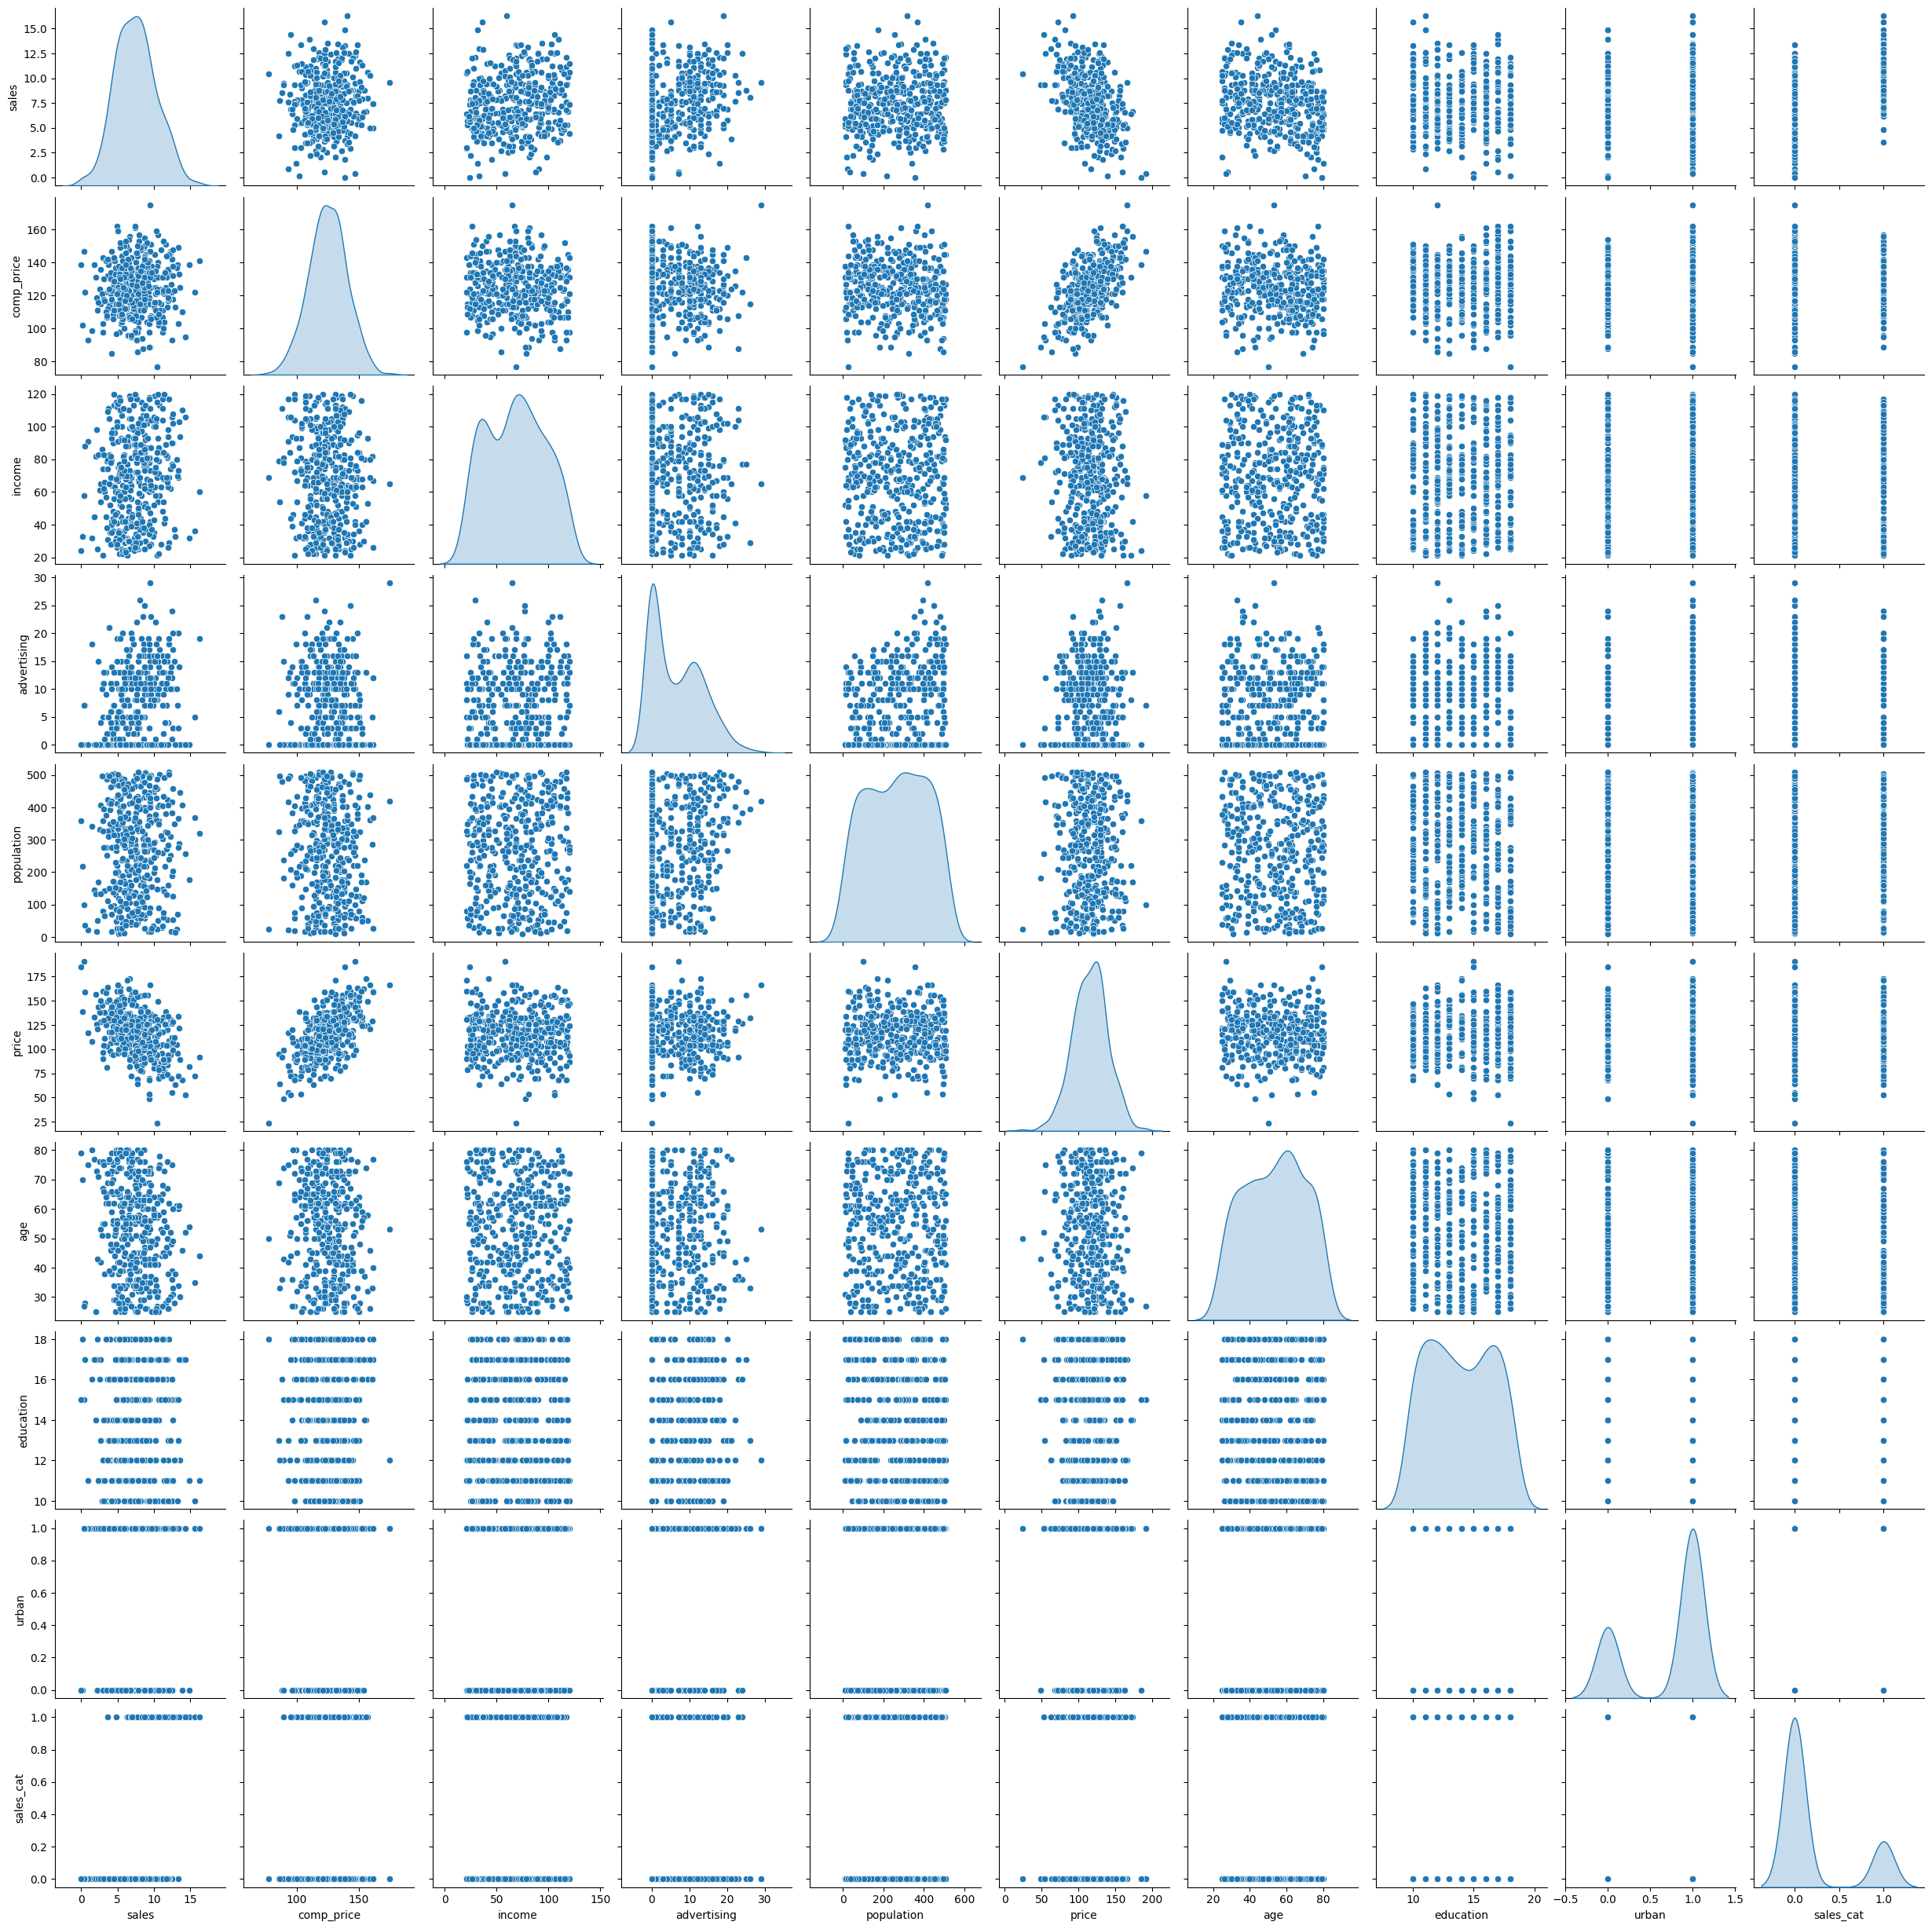

In [ ]:
import seaborn as sns
sns.pairplot(dataset,diag_kind='kde')

<Axes: >

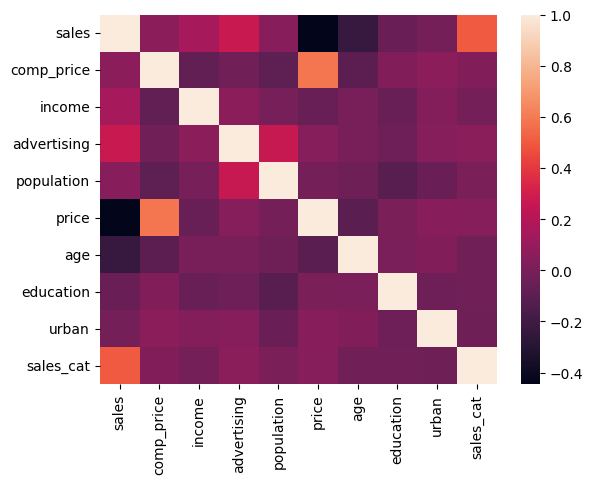

In [ ]:
sns.heatmap(dataset.corr())

<Axes: xlabel='sales', ylabel='sales_cat'>

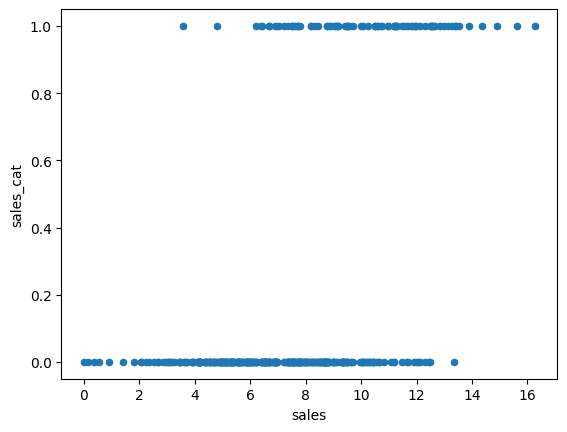

In [ ]:
dataset.plot(kind='scatter', x='sales', y='sales_cat')

<Axes: xlabel='comp_price', ylabel='sales_cat'>

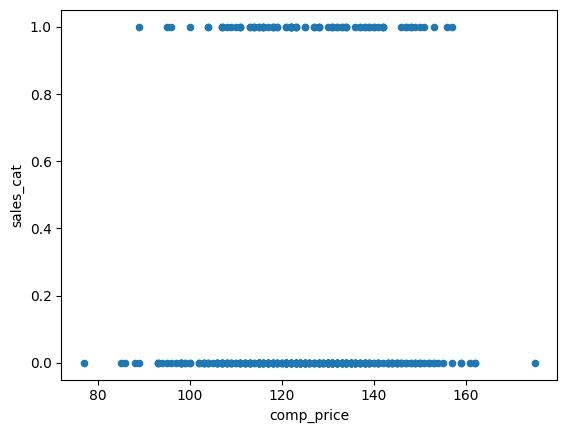

In [ ]:
dataset.plot(kind='scatter', x='comp_price', y='sales_cat')

<Axes: xlabel='income', ylabel='sales_cat'>

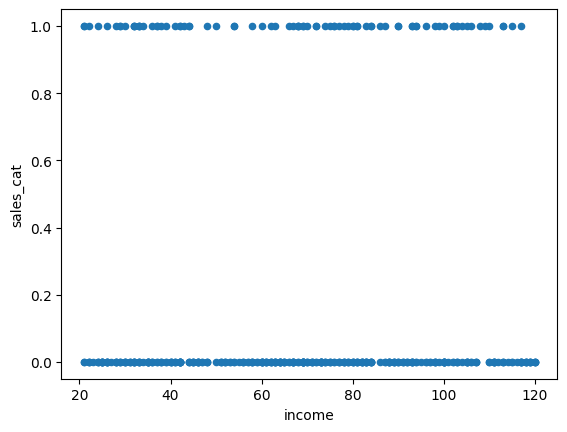

In [ ]:
dataset.plot(kind='scatter', x='income', y='sales_cat')

<Axes: xlabel='advertising', ylabel='sales_cat'>

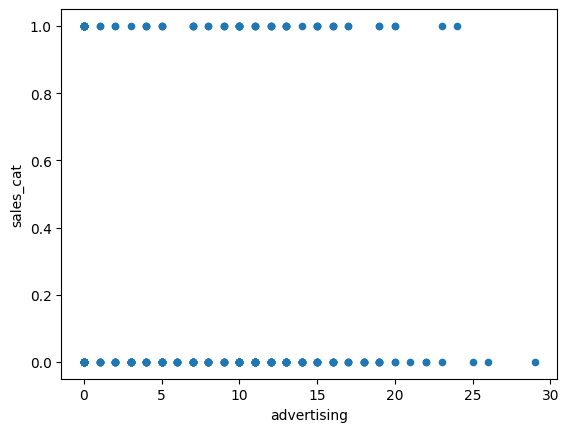

In [ ]:
dataset.plot(kind='scatter', x='advertising', y='sales_cat')

<Axes: xlabel='population', ylabel='sales_cat'>

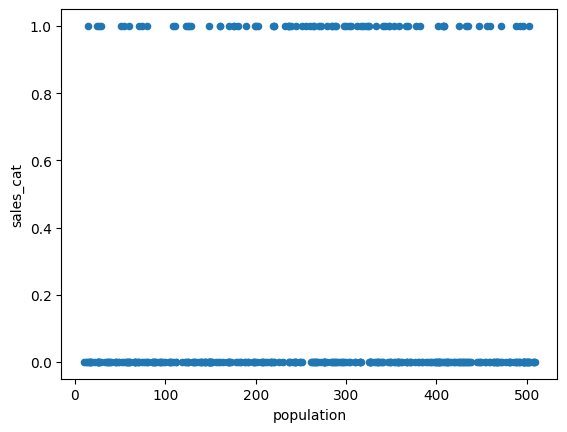

In [ ]:
dataset.plot(kind='scatter', x='population', y='sales_cat')

<Axes: xlabel='price', ylabel='sales_cat'>

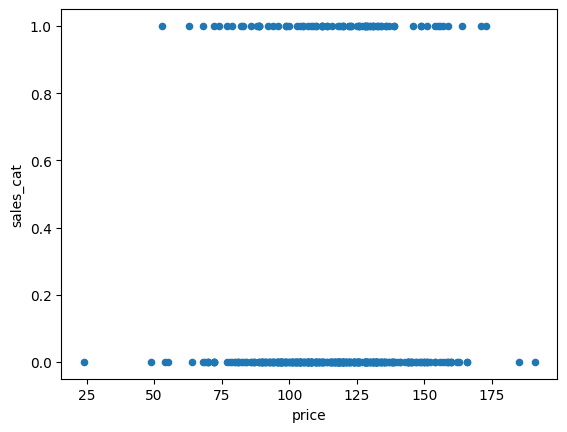

In [ ]:
dataset.plot(kind='scatter', x='price', y='sales_cat')

<Axes: xlabel='age', ylabel='sales_cat'>

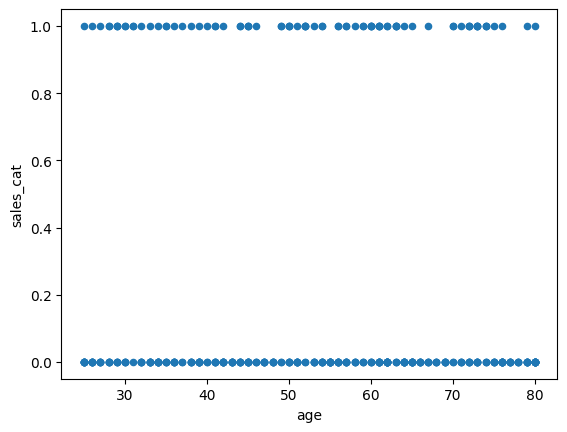

In [ ]:
dataset.plot(kind='scatter', x='age', y='sales_cat')

<Axes: xlabel='education', ylabel='sales_cat'>

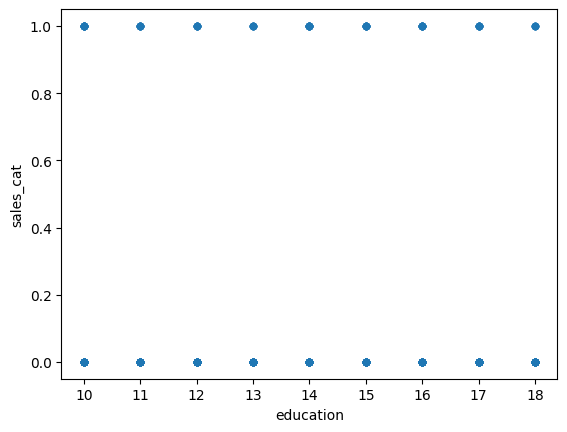

In [ ]:
dataset.plot(kind='scatter', x='education', y='sales_cat')

<Axes: xlabel='urban', ylabel='sales_cat'>

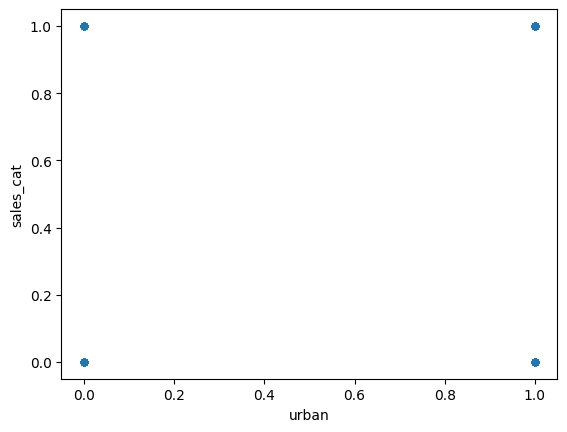

In [ ]:
dataset.plot(kind='scatter', x='urban', y='sales_cat')

# **Methodology**

Model Building

#  Using Entropy

In the methodology, entropy is utilized as a metric to quantify the disorder or impurity within the dataset during the construction of the decision tree. By selecting attribute-value pairs that minimize entropy at each split, the algorithm aims to create more homogeneous subsets, ultimately leading to accurate predictions or classifications at the terminal nodes. This process iterates recursively until maximum purity is achieved, enabling the model to make informed decisions based on the input features.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

In [191]:
dataset = pd.read_csv('/content/Child Car Safety Seats.csv')

In [192]:
dataset.isnull().sum().sum()


0

In [193]:
dataset['urban'].unique()

array([1, 0])

In [194]:
feature_cols=['sales','comp_price','income','advertising','population','price','age','education','urban']

In [195]:
x = dataset.drop(['sales_cat'],axis=1)
Y = dataset['sales_cat']

In [196]:

x.head()


,sales,comp_price,income,advertising,population,price,age,education,urban
0,9.50,138,73,11,276,120,42,17,1
1,11.22,111,48,16,260,83,65,10,1
2,10.06,113,35,10,269,80,59,12,1
3,7.40,117,100,4,466,97,55,14,1
4,4.15,141,64,3,340,128,38,13,1


In [197]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: sales_cat, dtype: int64

In [198]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)

[0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=1)

In [200]:
x_train.shape , x_test.shape

((320, 9), (80, 9))

In [201]:
Y_train.shape , Y_test.shape


((320,), (80,))

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [203]:
from sklearn.metrics import accuracy_score

In [204]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[0] <= 10.485\nentropy = 0.758\nsamples = 320\nvalue = [250, 70]'),
 Text(0.25, 0.625, 'x[0] <= 6.19\nentropy = 0.528\nsamples = 268\nvalue = [236, 32]'),
 Text(0.125, 0.375, 'x[5] <= 148.0\nentropy = 0.13\nsamples = 111\nvalue = [109, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(0.375, 0.375, 'x[5] <= 119.5\nentropy = 0.704\nsamples = 157\nvalue = [127, 30]'),
 Text(0.3125, 0.125, 'entropy = 0.359\nsamples = 88\nvalue = [82, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.932\nsamples = 69\nvalue = [45, 24]'),
 Text(0.75, 0.625, 'x[5] <= 106.0\nentropy = 0.84\nsamples = 52\nvalue = [14, 38]'),
 Text(0.625, 0.375, 'x[2] <= 61.5\nentropy = 0.981\nsamples = 31\nvalue = [13, 18]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6875, 0.125, 'entropy = 0.976\nsamples = 22\nvalue = [13, 9]'),
 Text(0.875, 0.375, 'x[2] <= 118.5\nentropy = 0.276

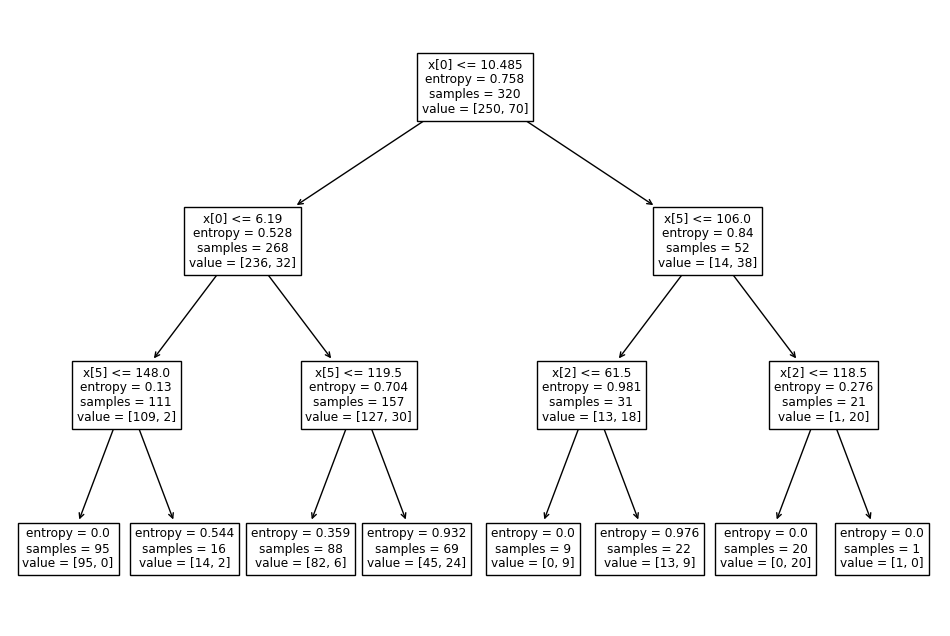

In [205]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train, Y_train))



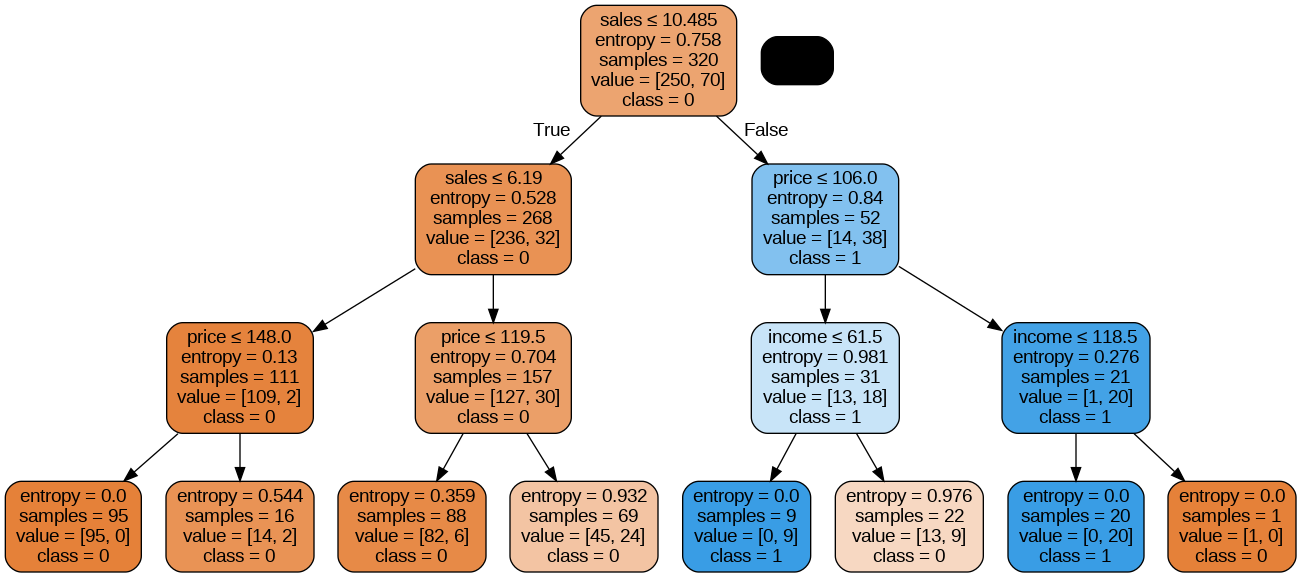

In [206]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf_en, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())


In [207]:
Y_pred_en = clf_en.predict(x_test)

In [208]:
Y_pred_train_en = clf_en.predict(x_train)

In [209]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_en)))

Model accuracy score with criterion entropy: 0.8625
Training-set accuracy score: 0.8719


In [210]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(x_test, Y_test)))

Training set score: 0.8719
Test set score: 0.8625


In [211]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [212]:
cm = confusion_matrix(Y_test, Y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[65  0]
 [11  4]]


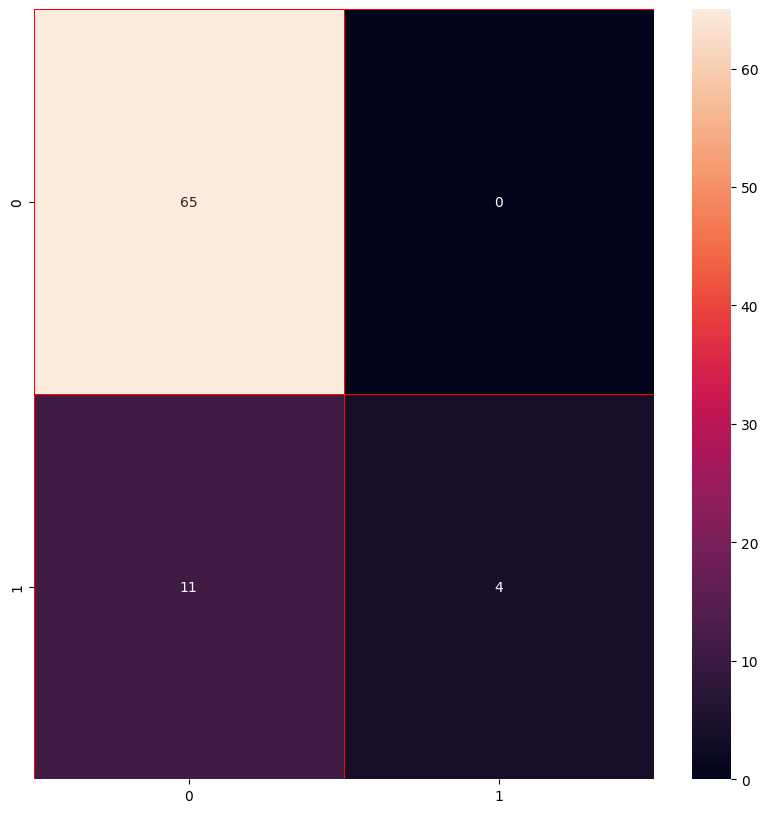

<Figure size 640x480 with 0 Axes>

In [213]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

In [214]:
print(classification_report(Y_test, Y_pred_en))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        65
           1       1.00      0.27      0.42        15

    accuracy                           0.86        80
   macro avg       0.93      0.63      0.67        80
weighted avg       0.88      0.86      0.83        80



In [215]:
f1_score = f1_score(Y_test, Y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.4210526315789474


# **Using Gini Index**

In the methodology, the Gini index serves as a criterion for feature selection within the decision tree algorithm. By selecting the attribute-value pairs that minimize the Gini impurity index, the algorithm identifies the most informative features for splitting the dataset. A higher Gini index signifies greater impurity within the data, guiding the algorithm to prioritize attributes that result in more homogeneous subsets upon splitting. The simplicity and binary nature of the Gini index make it a straightforward and efficient metric for partitioning categorical variables into "success" or "failure" outcomes.

In [216]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[0] <= 10.485\ngini = 0.342\nsamples = 320\nvalue = [250, 70]'),
 Text(0.25, 0.625, 'x[0] <= 6.19\ngini = 0.21\nsamples = 268\nvalue = [236, 32]'),
 Text(0.125, 0.375, 'x[5] <= 163.5\ngini = 0.035\nsamples = 111\nvalue = [109, 2]'),
 Text(0.0625, 0.125, 'gini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.375, 'x[5] <= 119.5\ngini = 0.309\nsamples = 157\nvalue = [127, 30]'),
 Text(0.3125, 0.125, 'gini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.4375, 0.125, 'gini = 0.454\nsamples = 69\nvalue = [45, 24]'),
 Text(0.75, 0.625, 'x[5] <= 106.0\ngini = 0.393\nsamples = 52\nvalue = [14, 38]'),
 Text(0.625, 0.375, 'x[2] <= 61.5\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.6875, 0.125, 'gini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.875, 0.375, 'x[2] <= 118.5\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Te

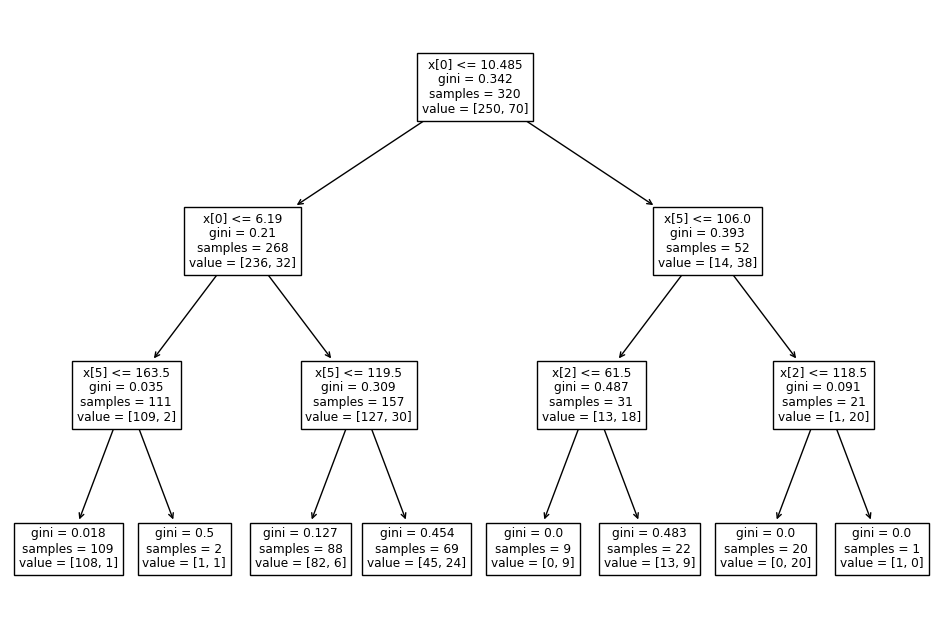

In [217]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, Y_train))

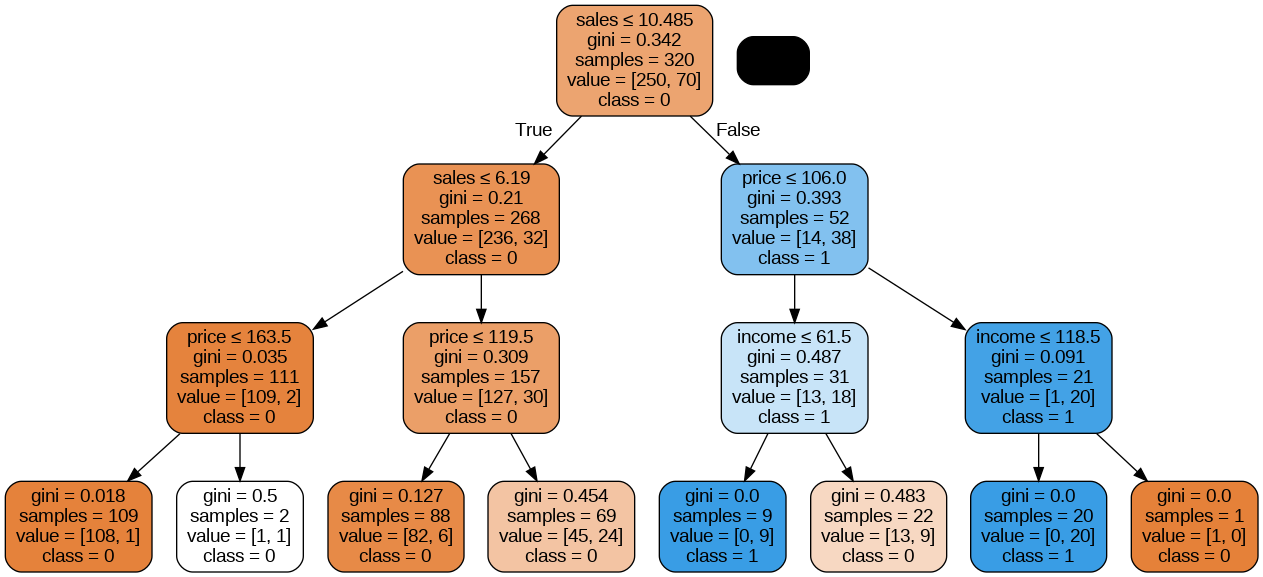

In [218]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
Image(graph.create_png())

In [219]:
Y_pred_gini = clf_gini.predict(x_test)


In [220]:
Y_pred_train_gini = clf_gini.predict(x_train)

Y_pred_train_gini

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [222]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.8625
Training-set accuracy score: 0.8719


# **Result Analysis**

1.Model Accuracy Score:

The model accuracy score using both entropy and Gini index criteria is 0.8625, indicating that the model correctly predicts the target variable for approximately 86.25% of the instances in the dataset.
This metric provides an overall assessment of how well the model performs in making correct predictions on unseen data.

2.Training-Set Accuracy Score:

The training-set accuracy score is 0.8719, which suggests that the model performs slightly better when evaluated on the training data compared to the overall accuracy score.
This score indicates the proportion of correctly predicted instances within the training dataset.

3.Comparison between Entropy and Gini Index:

Both the entropy and Gini index criteria yield the same accuracy scores for the model, suggesting that in this specific case, the choice of splitting criterion doesn't significantly impact the predictive performance of the decision tree model.
It's noteworthy that while the accuracy scores are the same, the decision trees generated using entropy and Gini index might have different structures and attribute importance rankings.

# **Conclusion**

Decision-Tree Classifier model using both gini index and entropy have no  difference in model accuracy and training set accuracy, so there is no sign of overfitting.

# **References**

DataSet Link :https://www.kaggle.com/datasets/motahareshokri/child-car-safety-seats

Code Refereance:https://www.datacamp.com/tutorial/decision-tree-classification-python